# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

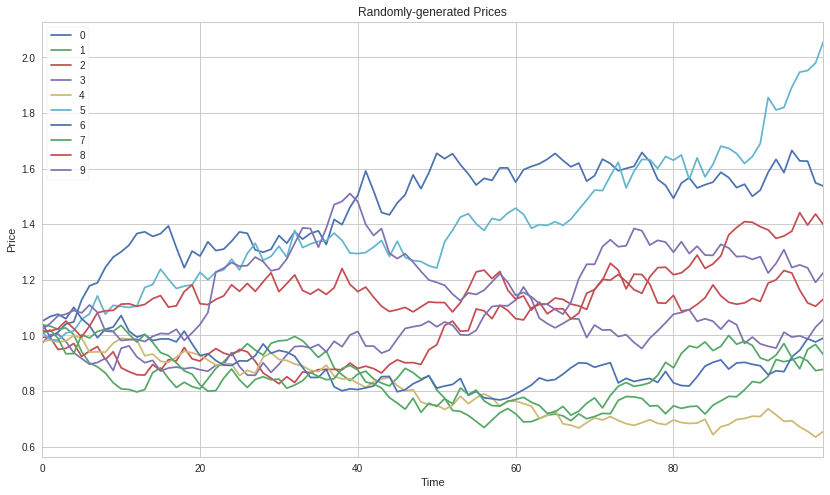

In [2]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

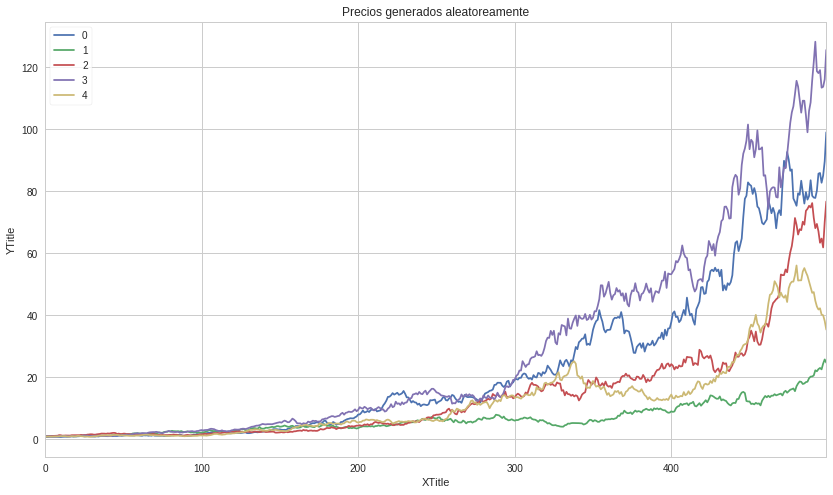

In [3]:
datos = pd.DataFrame(np.random.normal(1.01, 0.05, (500, 5)))
precios = datos.cumprod()
precios.plot()
plt.title('Precios generados aleatoreamente')
plt.xlabel('XTitle')
plt.ylabel('YTitle')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [4]:
s = pd.Series([1, 2, np.nan, 4, 5])
print s

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [5]:
ex = pd.Series(['a', 'b', np.nan, "dsd"])
print ex, type(ex)

0      a
1      b
2    NaN
3    dsd
dtype: object <class 'pandas.core.series.Series'>


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [6]:
print s.name

None


In [7]:
print ex.name

None


This name can be directly modified with no repercussions.

In [8]:
s.name = "Toy Series"
print s.name

Toy Series


In [9]:
ex.name = "Este es un nombre de serie"
print ex.name

Este es un nombre de serie


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [10]:
print s.index

RangeIndex(start=0, stop=5, step=1)


In [11]:
print ex.index

RangeIndex(start=0, stop=4, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [12]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print new_index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [13]:
indice = pd.date_range("2011-01-04", periods=len(ex), freq="M")
print indice

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30'], dtype='datetime64[ns]', freq='M')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [14]:
s.index = new_index
print s.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [15]:
ex.index = indice
print ex.index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30'], dtype='datetime64[ns]', freq='M')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [16]:
print "First element of the series: ", s.iloc[0]
print "Last element of the series: ", s.iloc[len(s)-1]

First element of the series:  1.0
Last element of the series:  5.0


In [17]:
print "1ro serie: ", ex.iloc[0]
print "ultmo serie: ", ex.iloc[len(ex)-1]

1ro serie:  a
ultmo serie:  dsd


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [18]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

In [19]:
ex.iloc[:3]

2011-01-31      a
2011-02-28      b
2011-03-31    NaN
Freq: M, Name: Este es un nombre de serie, dtype: object

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [20]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

In [21]:
inicio = 0
fin = len(ex) - 1
paso = 2

ex.iloc[inicio:fin:paso]

2011-01-31      a
2011-03-31    NaN
Freq: 2M, Name: Este es un nombre de serie, dtype: object

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [22]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

In [23]:
ex.iloc[::-1]

2011-04-30    dsd
2011-03-31    NaN
2011-02-28      b
2011-01-31      a
Freq: -1M, Name: Este es un nombre de serie, dtype: object

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [24]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

In [25]:
ex.iloc[-1:-4:-2]

2011-04-30    dsd
2011-02-28      b
Freq: -2M, Name: Este es un nombre de serie, dtype: object

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [26]:
s.loc['2016-01-01']

1.0

In [27]:
ex.loc['2011-04-30']

'dsd'

Or even for a range of dates!

In [28]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

In [29]:
ex.loc['2011-01-31':'2011-04-30']

2011-01-31      a
2011-02-28      b
2011-03-31    NaN
2011-04-30    dsd
Freq: M, Name: Este es un nombre de serie, dtype: object

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [30]:
print s < 3

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


In [31]:
print ex == 'dsd'

2011-01-31    False
2011-02-28    False
2011-03-31    False
2011-04-30     True
Freq: M, Name: Este es un nombre de serie, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [32]:
print s.loc[s < 3]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


In [33]:
print ex.loc[ex == 'dsd']

2011-04-30    dsd
Freq: M, Name: Este es un nombre de serie, dtype: object


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [34]:
print s.loc[(s < 3) & (s > 1)]

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


In [35]:
print ex.loc[(ex == 'dsd') | (ex == 'a')]

2011-01-31      a
2011-04-30    dsd
Freq: 3M, Name: Este es un nombre de serie, dtype: object


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [36]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")

In [37]:
simbolo = "CMG"
inicio = "2010-02-04"
fin = "2018-03-24"
precios = get_pricing(simbolo, start_date=inicio, end_date=fin, fields="price")

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [38]:
print "\n", type(prices)
prices.head(5) 


 <class 'pandas.core.series.Series'>


2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: Equity(28016 [CMG]), dtype: float64

In [39]:
print "\n", type(precios)
precios.head(7) 


 <class 'pandas.core.series.Series'>


2010-02-04 00:00:00+00:00     98.50
2010-02-05 00:00:00+00:00     95.34
2010-02-08 00:00:00+00:00     99.89
2010-02-09 00:00:00+00:00    100.64
2010-02-10 00:00:00+00:00     99.55
2010-02-11 00:00:00+00:00    101.09
2010-02-12 00:00:00+00:00    104.67
Freq: C, Name: Equity(28016 [CMG]), dtype: float64

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [40]:
print 'Old name: ', prices.name
prices.name = symbol
print 'New name: ', prices.name

Old name:  Equity(28016 [CMG])
New name:  CMG


In [41]:
print 'Old name: ', precios.name
precios.name = simbolo
print 'New name: ', precios.name

Old name:  Equity(28016 [CMG])
New name:  CMG


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [42]:
print prices.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns, UTC]', length=1006, freq='C')


In [43]:
print precios.index

DatetimeIndex(['2010-02-04', '2010-02-05', '2010-02-08', '2010-02-09',
               '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-16',
               '2010-02-17', '2010-02-18',
               ...
               '2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15',
               '2018-03-16', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23'],
              dtype='datetime64[ns, UTC]', length=2048, freq='C')


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [44]:
monthly_prices = prices.resample('M')
monthly_prices.head(10)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  


2012-01-31 00:00:00+00:00    354.812100
2012-02-29 00:00:00+00:00    379.582000
2012-03-31 00:00:00+00:00    406.996182
2012-04-30 00:00:00+00:00    422.818500
2012-05-31 00:00:00+00:00    405.811091
2012-06-30 00:00:00+00:00    403.068571
2012-07-31 00:00:00+00:00    353.849619
2012-08-31 00:00:00+00:00    294.516522
2012-09-30 00:00:00+00:00    326.566316
2012-10-31 00:00:00+00:00    276.545333
Freq: M, Name: CMG, dtype: float64

In [45]:
semanal_p = precios.resample('W')
semanal_p.head(10)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  


2010-02-07 00:00:00+00:00     96.9200
2010-02-14 00:00:00+00:00    101.1680
2010-02-21 00:00:00+00:00    104.3250
2010-02-28 00:00:00+00:00    104.1660
2010-03-07 00:00:00+00:00    109.5480
2010-03-14 00:00:00+00:00    112.7280
2010-03-21 00:00:00+00:00    114.3600
2010-03-28 00:00:00+00:00    114.6360
2010-04-04 00:00:00+00:00    114.0175
2010-04-11 00:00:00+00:00    121.7980
Freq: W-SUN, Name: CMG, dtype: float64

The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [46]:
monthly_prices_med = prices.resample('M', how='median')
monthly_prices_med.head(10)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  """Entry point for launching an IPython kernel.


2012-01-31 00:00:00+00:00    355.380
2012-02-29 00:00:00+00:00    378.295
2012-03-31 00:00:00+00:00    408.850
2012-04-30 00:00:00+00:00    420.900
2012-05-31 00:00:00+00:00    405.390
2012-06-30 00:00:00+00:00    402.790
2012-07-31 00:00:00+00:00    380.370
2012-08-31 00:00:00+00:00    295.380
2012-09-30 00:00:00+00:00    332.990
2012-10-31 00:00:00+00:00    286.440
Freq: M, Name: CMG, dtype: float64

In [47]:
semanal_p_m = precios.resample('W', how='median')
semanal_p_m.head(5)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  """Entry point for launching an IPython kernel.


2010-02-07 00:00:00+00:00     96.920
2010-02-14 00:00:00+00:00    100.640
2010-02-21 00:00:00+00:00    104.355
2010-02-28 00:00:00+00:00    103.930
2010-03-07 00:00:00+00:00    110.000
Freq: W-SUN, Name: CMG, dtype: float64

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [48]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """


2012-01-31 00:00:00+00:00    340.98
2012-02-29 00:00:00+00:00    370.84
2012-03-31 00:00:00+00:00    394.58
2012-04-30 00:00:00+00:00    418.65
2012-05-31 00:00:00+00:00    419.78
2012-06-30 00:00:00+00:00    397.14
2012-07-31 00:00:00+00:00    382.97
2012-08-31 00:00:00+00:00    280.60
2012-09-30 00:00:00+00:00    285.91
2012-10-31 00:00:00+00:00    316.13
Freq: M, Name: CMG, dtype: float64

In [49]:
def funcion_cr(arr):    
    return arr[0]

p_m_p = precios.resample('W', how=funcion_cr)
p_m_p.head(5)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


2010-02-07 00:00:00+00:00     98.50
2010-02-14 00:00:00+00:00     99.89
2010-02-21 00:00:00+00:00    103.63
2010-02-28 00:00:00+00:00    103.93
2010-03-07 00:00:00+00:00    107.86
Freq: W-SUN, Name: CMG, dtype: float64

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [50]:
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)

2012-01-02 19:00:00-05:00    340.980
2012-01-03 19:00:00-05:00    348.740
2012-01-04 19:00:00-05:00    349.990
2012-01-05 19:00:00-05:00    348.950
2012-01-08 19:00:00-05:00    339.522
2012-01-09 19:00:00-05:00    340.700
2012-01-10 19:00:00-05:00    347.330
2012-01-11 19:00:00-05:00    347.830
2012-01-12 19:00:00-05:00    354.390
2012-01-16 19:00:00-05:00    353.610
Freq: C, Name: CMG, dtype: float64

In [51]:
ep = precios.tz_convert('US/Eastern')
ep.head(7)

2010-02-03 19:00:00-05:00     98.50
2010-02-04 19:00:00-05:00     95.34
2010-02-07 19:00:00-05:00     99.89
2010-02-08 19:00:00-05:00    100.64
2010-02-09 19:00:00-05:00     99.55
2010-02-10 19:00:00-05:00    101.09
2010-02-11 19:00:00-05:00    104.67
Freq: C, Name: CMG, dtype: float64

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [52]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print calendar_dates

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


In [53]:
cd = pd.date_range(start=inicio, end=fin, freq='S', tz='UTC')
print cd

DatetimeIndex(['2010-02-04 00:00:00+00:00', '2010-02-04 00:00:01+00:00',
               '2010-02-04 00:00:02+00:00', '2010-02-04 00:00:03+00:00',
               '2010-02-04 00:00:04+00:00', '2010-02-04 00:00:05+00:00',
               '2010-02-04 00:00:06+00:00', '2010-02-04 00:00:07+00:00',
               '2010-02-04 00:00:08+00:00', '2010-02-04 00:00:09+00:00',
               ...
               '2018-03-23 23:59:51+00:00', '2018-03-23 23:59:52+00:00',
               '2018-03-23 23:59:53+00:00', '2018-03-23 23:59:54+00:00',
               '2018-03-23 23:59:55+00:00', '2018-03-23 23:59:56+00:00',
               '2018-03-23 23:59:57+00:00', '2018-03-23 23:59:58+00:00',
               '2018-03-23 23:59:59+00:00', '2018-03-24 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=256608001, freq='S')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [54]:
cps = prices.reindex(cd, method='ffill')
cps.head(7)

2010-02-04 00:00:00+00:00   NaN
2010-02-04 00:00:01+00:00   NaN
2010-02-04 00:00:02+00:00   NaN
2010-02-04 00:00:03+00:00   NaN
2010-02-04 00:00:04+00:00   NaN
2010-02-04 00:00:05+00:00   NaN
2010-02-04 00:00:06+00:00   NaN
Freq: S, Name: CMG, dtype: float64

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [55]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

NameError: name 'calendar_prices' is not defined

In [ ]:
mfp = cps.fillna(cps.mean())
mfp.head(10)

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [ ]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

In [ ]:
bfp = cps.fillna(method='bfill')
bfp.head(7)

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [ ]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

In [ ]:
dps = cps.dropna()
dps.head(10)

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

In [ ]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

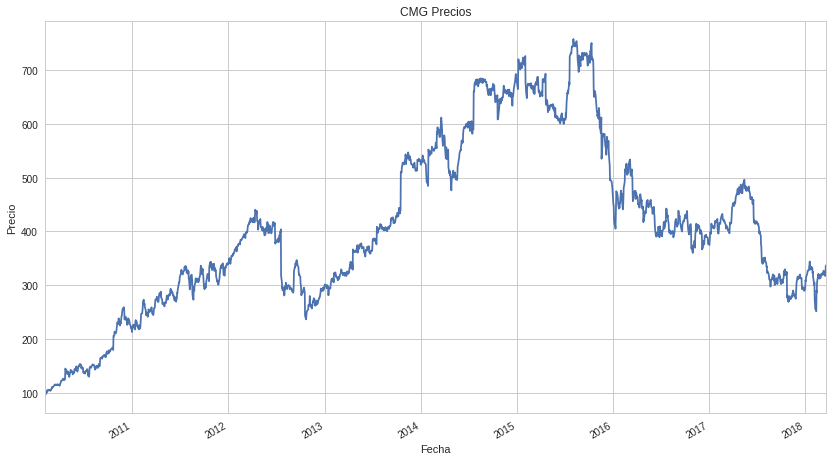

In [56]:
precios.plot();
plt.title(simbolo + " Precios")
plt.ylabel("Precio")
plt.xlabel("Fecha");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [ ]:
print "Mean: ", prices.mean()
print "Standard deviation: ", prices.std()

In [57]:
print "Media: ", precios.mean()
print "Desviación estándar: ", precios.std()

Media:  407.832061523437
Desviación estándar:  158.26696980606755


In [ ]:
print "Summary Statistics"
print prices.describe()

In [58]:
print "Resumen de estadísticas"
print precios.describe()

Resumen de estadísticas
count    2048.000000
mean      407.832062
std       158.266970
min        95.340000
25%       300.992500
50%       396.295000
75%       520.564750
max       757.770000
Name: CMG, dtype: float64


We can easily modify `Series` with scalars using our basic mathematical operators.

In [60]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

2012-01-03 00:00:00+00:00    671.960
2012-01-04 00:00:00+00:00    687.480
2012-01-05 00:00:00+00:00    689.980
2012-01-06 00:00:00+00:00    687.900
2012-01-09 00:00:00+00:00    669.044
Freq: C, Name: CMG, dtype: float64

In [59]:
mp = precios * 3 - 4
mp.head(4)

2010-02-04 00:00:00+00:00    291.50
2010-02-05 00:00:00+00:00    282.02
2010-02-08 00:00:00+00:00    295.67
2010-02-09 00:00:00+00:00    297.92
Freq: C, Name: CMG, dtype: float64

And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [ ]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

In [63]:
np = precios + 7 * pd.Series(np.random.normal(0, 4, len(precios)), index=precios.index) + 14
np.head(5)

2010-02-04 00:00:00+00:00     99.139291
2010-02-05 00:00:00+00:00    110.252717
2010-02-08 00:00:00+00:00    143.034973
2010-02-09 00:00:00+00:00    136.026831
2010-02-10 00:00:00+00:00    144.177443
Freq: C, dtype: float64

If there are no matching indices, however, we may get an empty `Series` in return.

In [65]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

AttributeError: 'Series' object has no attribute 'random'

In [64]:
es = precios + pd.Series(np.random.normal(0, 2, len(precios)))
es.head(5)

AttributeError: 'Series' object has no attribute 'random'

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [67]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

In [66]:
ar = precios.diff()[2:]
mr = precios.pct_change()[2:]

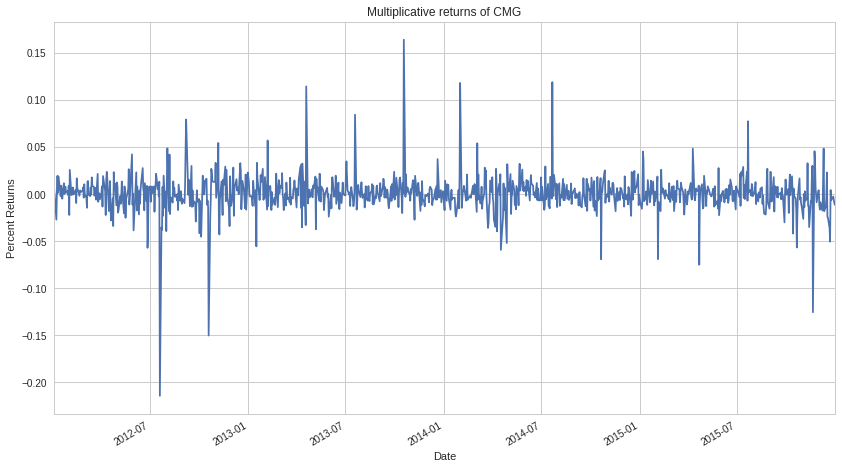

In [68]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

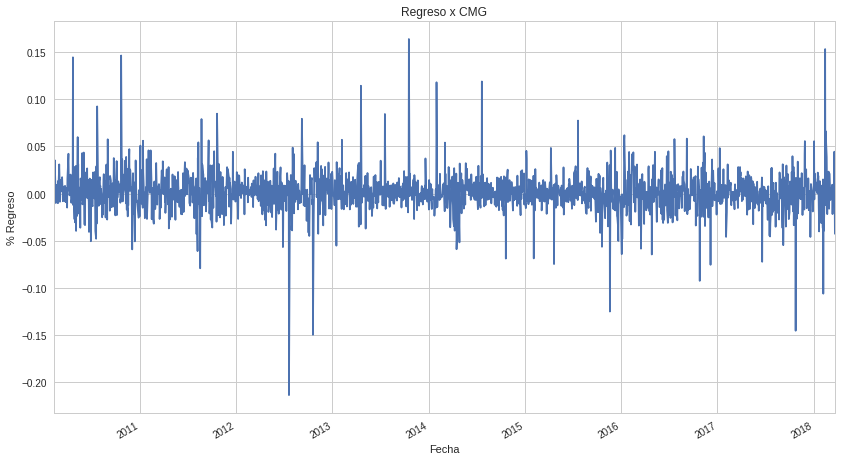

In [69]:
plt.title("Regreso x " + simbolo)
plt.xlabel("Fecha")
plt.ylabel("% Regreso")
mr.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [70]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.name = "30-day rolling mean"

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


In [71]:
rm = pd.rolling_mean(precios, 25)
rm.name = "25- días  media"

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  """Entry point for launching an IPython kernel.


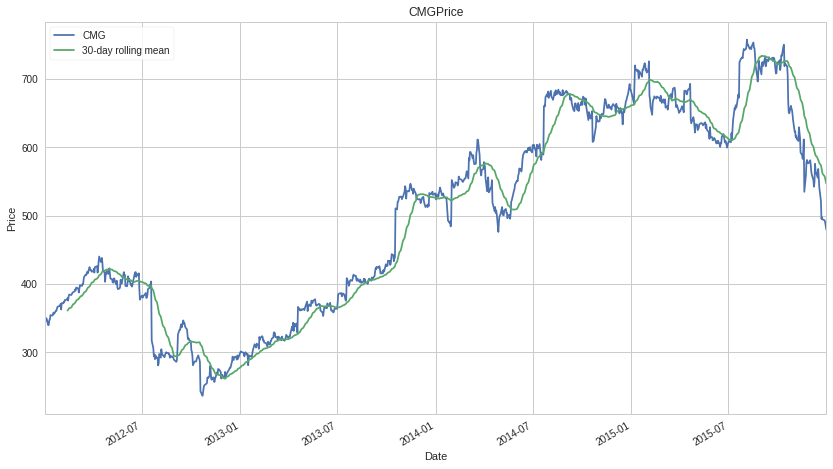

In [72]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

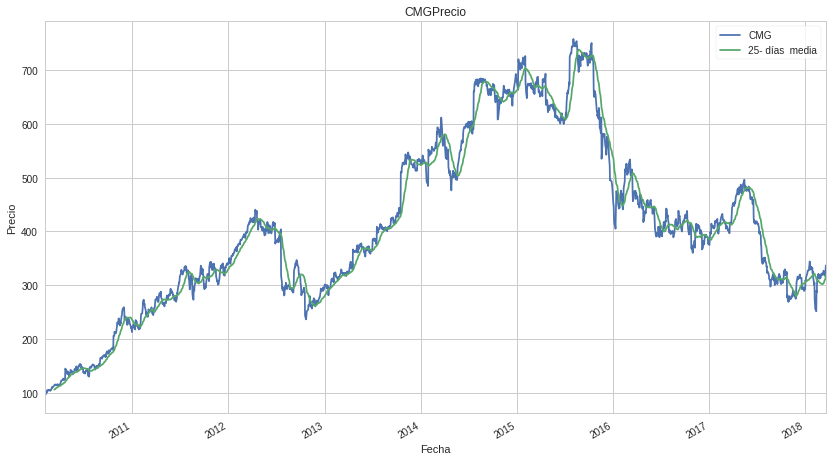

In [73]:
precios.plot()
rm.plot()
plt.title(simbolo + "Precio")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend();

In [74]:
rolling_std = pd.rolling_std(prices, 30)
rolling_std.name = "30-day rolling volatility"

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
  """Entry point for launching an IPython kernel.


In [75]:
rstd = pd.rolling_std(precios, 25)
rstd.name = "25 días vol"

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).std()
  """Entry point for launching an IPython kernel.


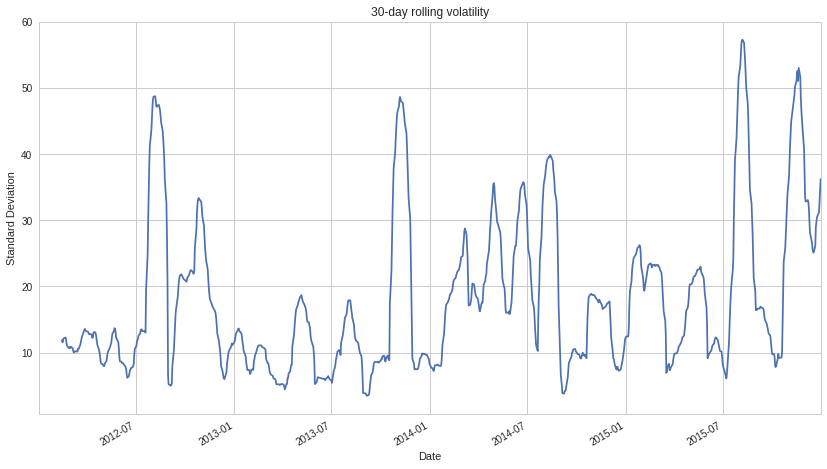

In [77]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

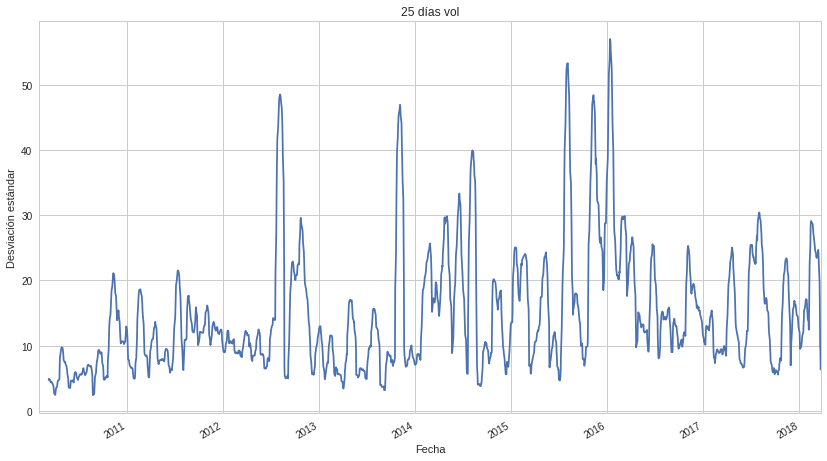

In [76]:
rstd.plot()
plt.title(rstd.name);
plt.xlabel("Fecha")
plt.ylabel("Desviación estándar");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [80]:
print np.median(mult_returns)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [78]:
print np.median(mr)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [81]:
print mult_returns.median()

0.0001604466835671836


In [79]:
print mr.median()

0.0006714186566552094


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [82]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print dict_data

AttributeError: 'Series' object has no attribute 'random'

In [83]:
dato_dicionario = {
    'pr' : [9, 8, 7, 6, 5],
    'sd' : ['as', 'asd', 'asdf', 'asdfg', 'asdfgh'],
    'to' : np.random.normal(0, 2, 3)
}
print dato_dicionario

AttributeError: 'Series' object has no attribute 'random'

Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [84]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print frame_data

NameError: name 'dict_data' is not defined

In [85]:
fd = pd.DataFrame(dato_dicionario, index=pd.date_range('2014-02-01', periods=3))
print fd

NameError: name 'dato_dicionario' is not defined

As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [86]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print numbers

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


In [87]:
c_1 = pd.Series([3, 6, 4, 80, 10], name='Evens')
c_2 = pd.Series([51, 6, 2, 9, 9], name="Odds")
nums = pd.concat([s_1, s_2], axis=1)
print nums

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [88]:
print numbers.columns

Index(['Evens', 'Odds'], dtype='object')


In [89]:
print nums.columns

Index(['Evens', 'Odds'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [91]:
numbers.columns = ['Shmevens', 'Shmodds']
print numbers

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In [90]:
nums.columns = ['ssasd', 'dfdf']
print nums

   ssasd  dfdf
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [92]:
print numbers.index

RangeIndex(start=0, stop=5, step=1)


In [93]:
print nums.index

RangeIndex(start=0, stop=5, step=1)


In [94]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print numbers

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


In [95]:
nums.index = pd.date_range("2013-02-05", periods=len(nums))
print nums

            ssasd  dfdf
2013-02-05      2     1
2013-02-06      4     3
2013-02-07      6     5
2013-02-08      8     7
2013-02-09     10     9


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [96]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

In [97]:
nums.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

This returns a NumPy array.

In [98]:
type(numbers.values)

<class 'numpy.ndarray'>

In [99]:
type(nums.values)

<class 'numpy.ndarray'>

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [100]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol

In [104]:
simbolo = ["CMG", "MCD", "SHAK", "WFM"]
inicio = "2014-02-02"
fin = "2018-02-22"
precio = get_pricing(simbolo, start_date=inicio, end_date=fin, fields="price")
if isinstance(symbol, list):
    precio.columns = map(lambda x: x.symbol, precios.columns)
else:
    precio.name = simbolo

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [105]:
prices.CMG.head()

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: CMG, dtype: float64

In [107]:
precio.SHAK.head()

2014-02-03 00:00:00+00:00   NaN
2014-02-04 00:00:00+00:00   NaN
2014-02-05 00:00:00+00:00   NaN
2014-02-06 00:00:00+00:00   NaN
2014-02-07 00:00:00+00:00   NaN
Freq: C, Name: SHAK, dtype: float64

We can also use `loc[]` to access an individual column like so.

In [108]:
prices.loc[:, 'CMG'].head()

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: CMG, dtype: float64

In [109]:
precio.loc[:, 'SHAK'].head()

2014-02-03 00:00:00+00:00   NaN
2014-02-04 00:00:00+00:00   NaN
2014-02-05 00:00:00+00:00   NaN
2014-02-06 00:00:00+00:00   NaN
2014-02-07 00:00:00+00:00   NaN
Freq: C, Name: SHAK, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

In [110]:
print type(prices.CMG)
print type(prices.loc[:, 'CMG'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [111]:
print type(precio.SHAK)
print type(precio.loc[:, 'SHAK'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [112]:
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,MCD
2012-01-03 00:00:00+00:00,340.980,86.631
2012-01-04 00:00:00+00:00,348.740,87.166
2012-01-05 00:00:00+00:00,349.990,87.526
2012-01-06 00:00:00+00:00,348.950,88.192
2012-01-09 00:00:00+00:00,339.522,87.342


In [113]:
precio.loc[:, ['CMG', 'SHAK']].head()

,CMG,SHAK
2014-02-03 00:00:00+00:00,544.20,NaN
2014-02-04 00:00:00+00:00,540.85,NaN
2014-02-05 00:00:00+00:00,542.12,NaN
2014-02-06 00:00:00+00:00,544.06,NaN
2014-02-07 00:00:00+00:00,548.90,NaN


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [114]:
prices.loc['2015-12-15':'2015-12-22']

,CMG,MCD,SHAK,WFM
2015-12-15 00:00:00+00:00,555.64,116.96,41.510,32.96
2015-12-16 00:00:00+00:00,568.50,117.85,40.140,33.65
2015-12-17 00:00:00+00:00,554.91,117.54,38.500,33.38
2015-12-18 00:00:00+00:00,541.08,116.58,39.380,32.72
2015-12-21 00:00:00+00:00,521.71,117.70,38.205,32.98
2015-12-22 00:00:00+00:00,495.41,117.71,39.760,34.79


In [115]:
precio.loc['2018-02-25':'2020-10-12']

,CMG,MCD,SHAK,WFM


This plays nicely with lists of columns, too.

In [116]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

,CMG,MCD
2015-12-15 00:00:00+00:00,555.64,116.96
2015-12-16 00:00:00+00:00,568.50,117.85
2015-12-17 00:00:00+00:00,554.91,117.54
2015-12-18 00:00:00+00:00,541.08,116.58
2015-12-21 00:00:00+00:00,521.71,117.70
2015-12-22 00:00:00+00:00,495.41,117.71


In [117]:
precio.loc['2012-05-05':'2017-11-20', ['SHAK', 'MCD']]

,SHAK,MCD
2014-02-03 00:00:00+00:00,NaN,82.223
2014-02-04 00:00:00+00:00,NaN,82.276
2014-02-05 00:00:00+00:00,NaN,82.701
2014-02-06 00:00:00+00:00,NaN,83.903
2014-02-07 00:00:00+00:00,NaN,84.769
2014-02-10 00:00:00+00:00,NaN,83.823
2014-02-11 00:00:00+00:00,NaN,84.247
2014-02-12 00:00:00+00:00,NaN,83.858
2014-02-13 00:00:00+00:00,NaN,84.353
2014-02-14 00:00:00+00:00,NaN,84.645


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [118]:
prices.iloc[0:2, 1]

2012-01-03 00:00:00+00:00    86.631
2012-01-04 00:00:00+00:00    87.166
Freq: C, Name: MCD, dtype: float64

In [119]:
precio.iloc[0:3, 2]

2014-02-03 00:00:00+00:00   NaN
2014-02-04 00:00:00+00:00   NaN
2014-02-05 00:00:00+00:00   NaN
Freq: C, Name: SHAK, dtype: float64

In [120]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20)

TypeError: can only concatenate list (not "range") to list

In [121]:
precio.iloc[[2, 9, 12] + range(7, 50, 1), [1, 4]].head(10)

TypeError: can only concatenate list (not "range") to list

#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [122]:
prices.loc[prices.MCD > prices.WFM].head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323


In [123]:
precio.loc[precio.SHAK > precio.WFM].head()

,CMG,MCD,SHAK,WFM
2015-03-31 00:00:00+00:00,650.57,89.893,50.23,49.990
2015-04-07 00:00:00+00:00,658.49,88.832,50.50,49.453
2015-04-08 00:00:00+00:00,654.73,89.312,50.04,49.414
2015-04-09 00:00:00+00:00,651.46,89.026,50.46,49.722
2015-04-10 00:00:00+00:00,683.01,90.197,49.79,49.578


We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [124]:
prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head()

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.58,89.331,45.76,51.583
2015-02-02 00:00:00+00:00,712.69,89.418,43.50,52.623
2015-02-03 00:00:00+00:00,726.07,90.791,44.87,52.880
2015-02-04 00:00:00+00:00,675.99,90.887,41.32,53.138
2015-02-05 00:00:00+00:00,670.57,91.177,42.46,52.851


In [125]:
precio.loc[(precio.MCD >= precio.WFM) & precio.SHAK.isnull()].head()

,CMG,MCD,SHAK,WFM
2014-02-03 00:00:00+00:00,544.20,82.223,NaN,49.580
2014-02-04 00:00:00+00:00,540.85,82.276,NaN,50.216
2014-02-05 00:00:00+00:00,542.12,82.701,NaN,50.244
2014-02-06 00:00:00+00:00,544.06,83.903,NaN,51.336
2014-02-07 00:00:00+00:00,548.90,84.769,NaN,51.421


#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [126]:
s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

,CMG,MCD,SHAK,WFM,TSLA
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788,28.06
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650,27.71
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257,27.12
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319,26.94
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323,27.21


In [127]:
c_1 = get_pricing('TSLA', start_date=inicio, end_date=fin, fields='price')
precio.loc[:, 'TSLA'] = c_1
precio.head(7)

,CMG,MCD,SHAK,WFM,TSLA
2014-02-03 00:00:00+00:00,544.20,82.223,NaN,49.580,177.14
2014-02-04 00:00:00+00:00,540.85,82.276,NaN,50.216,178.70
2014-02-05 00:00:00+00:00,542.12,82.701,NaN,50.244,174.43
2014-02-06 00:00:00+00:00,544.06,83.903,NaN,51.336,178.38
2014-02-07 00:00:00+00:00,548.90,84.769,NaN,51.421,186.50
2014-02-10 00:00:00+00:00,547.99,83.823,NaN,52.171,196.49
2014-02-11 00:00:00+00:00,544.22,84.247,NaN,53.034,196.66


It is also just as easy to remove a column.

In [ ]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

In [128]:
precio = precio.drop('TSLA', axis=1)
precio.head(5)

,CMG,MCD,SHAK,WFM
2014-02-03 00:00:00+00:00,544.20,82.223,NaN,49.580
2014-02-04 00:00:00+00:00,540.85,82.276,NaN,50.216
2014-02-05 00:00:00+00:00,542.12,82.701,NaN,50.244
2014-02-06 00:00:00+00:00,544.06,83.903,NaN,51.336
2014-02-07 00:00:00+00:00,548.90,84.769,NaN,51.421


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [129]:
df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

,Equity(8554 [SPY]),Equity(51653 [VXX]),Equity(5061 [MSFT]),Equity(24 [AAPL]),Equity(46631 [GOOG])
2012-01-03 00:00:00+00:00,118.414,NaN,23.997,54.684,NaN
2012-01-04 00:00:00+00:00,118.498,NaN,24.498,54.995,NaN
2012-01-05 00:00:00+00:00,118.850,NaN,24.749,55.597,NaN
2012-01-06 00:00:00+00:00,118.600,NaN,25.151,56.194,NaN
2012-01-09 00:00:00+00:00,118.795,NaN,24.811,56.098,NaN


In [130]:
rr1 = get_pricing(['SPY', 'VXX'], start_date=inicio, end_date=fin, fields='price')
rr2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=inicio, end_date=fin, fields='price')
rr3 = pd.concat([rr1, rr2], axis=2)
rr3.head()

,Equity(8554 [SPY]),Equity(51653 [VXX]),Equity(5061 [MSFT]),Equity(24 [AAPL]),Equity(46631 [GOOG])
2014-02-03 00:00:00+00:00,160.735,NaN,32.746,66.170,NaN
2014-02-04 00:00:00+00:00,161.852,NaN,32.629,67.115,NaN
2014-02-05 00:00:00+00:00,161.631,NaN,32.162,67.618,NaN
2014-02-06 00:00:00+00:00,163.744,NaN,32.485,68.002,NaN
2014-02-07 00:00:00+00:00,165.830,NaN,32.835,68.971,NaN


#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [131]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,CMG,MCD,SHAK,WFM,TSLA
2012-01-03 00:00:00+00:00,340.980,86.631,0.0,32.788,28.06
2012-01-04 00:00:00+00:00,348.740,87.166,0.0,33.650,27.71
2012-01-05 00:00:00+00:00,349.990,87.526,0.0,34.257,27.12
2012-01-06 00:00:00+00:00,348.950,88.192,0.0,34.319,26.94
2012-01-09 00:00:00+00:00,339.522,87.342,0.0,34.323,27.21


In [132]:
fp = precio.fillna(0)
fp.head(5)

,CMG,MCD,SHAK,WFM
2014-02-03 00:00:00+00:00,544.20,82.223,0.0,49.580
2014-02-04 00:00:00+00:00,540.85,82.276,0.0,50.216
2014-02-05 00:00:00+00:00,542.12,82.701,0.0,50.244
2014-02-06 00:00:00+00:00,544.06,83.903,0.0,51.336
2014-02-07 00:00:00+00:00,548.90,84.769,0.0,51.421


In [133]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,CMG,MCD,SHAK,WFM,TSLA
2012-01-03 00:00:00+00:00,340.980,86.631,45.76,32.788,28.06
2012-01-04 00:00:00+00:00,348.740,87.166,45.76,33.650,27.71
2012-01-05 00:00:00+00:00,349.990,87.526,45.76,34.257,27.12
2012-01-06 00:00:00+00:00,348.950,88.192,45.76,34.319,26.94
2012-01-09 00:00:00+00:00,339.522,87.342,45.76,34.323,27.21


In [134]:
bfp = precio.fillna(method='bfill')
bfp.head(8)

,CMG,MCD,SHAK,WFM
2014-02-03 00:00:00+00:00,544.20,82.223,45.76,49.580
2014-02-04 00:00:00+00:00,540.85,82.276,45.76,50.216
2014-02-05 00:00:00+00:00,542.12,82.701,45.76,50.244
2014-02-06 00:00:00+00:00,544.06,83.903,45.76,51.336
2014-02-07 00:00:00+00:00,548.90,84.769,45.76,51.421
2014-02-10 00:00:00+00:00,547.99,83.823,45.76,52.171
2014-02-11 00:00:00+00:00,544.22,84.247,45.76,53.034
2014-02-12 00:00:00+00:00,545.95,83.858,45.76,52.645


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [136]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,CMG,MCD,SHAK,WFM,TSLA
2015-01-30 00:00:00+00:00,709.58,89.331,45.76,51.583,203.60
2015-02-02 00:00:00+00:00,712.69,89.418,43.50,52.623,211.01
2015-02-03 00:00:00+00:00,726.07,90.791,44.87,52.880,218.36
2015-02-04 00:00:00+00:00,675.99,90.887,41.32,53.138,218.54
2015-02-05 00:00:00+00:00,670.57,91.177,42.46,52.851,220.96


In [135]:
dp = precio.dropna()
dp.head(9)

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.58,84.483,45.76,50.000
2015-02-02 00:00:00+00:00,712.69,84.565,43.50,51.007
2015-02-03 00:00:00+00:00,726.07,85.864,44.87,51.257
2015-02-04 00:00:00+00:00,675.99,85.955,41.32,51.506
2015-02-05 00:00:00+00:00,670.57,86.229,42.46,51.228
2015-02-06 00:00:00+00:00,659.52,85.928,41.80,51.372
2015-02-09 00:00:00+00:00,647.71,84.776,41.49,50.806
2015-02-10 00:00:00+00:00,664.53,85.946,41.49,50.883
2015-02-11 00:00:00+00:00,669.64,86.110,41.50,51.348


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

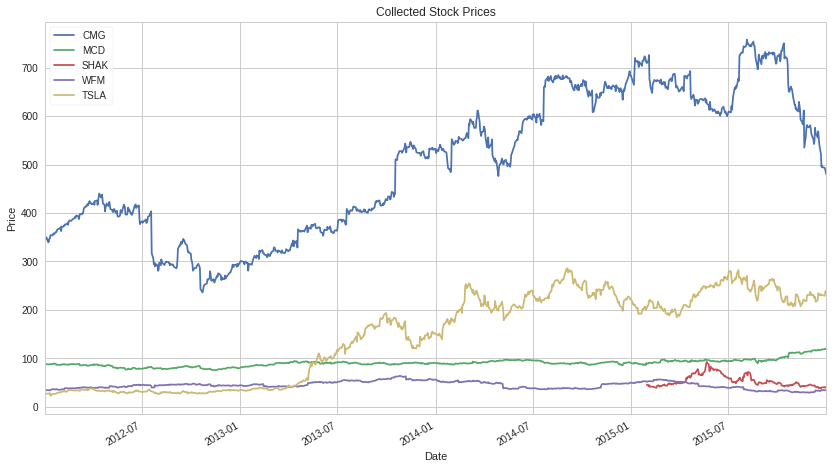

In [137]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

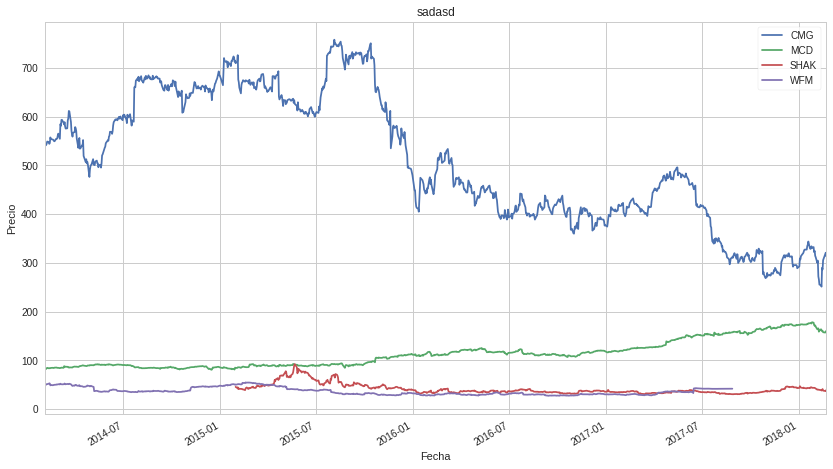

In [138]:
precio.plot()
plt.title("sadasd")
plt.ylabel("Precio")
plt.xlabel("Fecha");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [139]:
prices.mean(axis=0)

CMG     501.637439
MCD      90.433999
SHAK     53.530670
WFM      44.423044
TSLA    147.455109
dtype: float64

In [140]:
precio.mean(axis=1)

2014-02-03 00:00:00+00:00    225.334333
2014-02-04 00:00:00+00:00    224.447333
2014-02-05 00:00:00+00:00    225.021667
2014-02-06 00:00:00+00:00    226.433000
2014-02-07 00:00:00+00:00    228.363333
2014-02-10 00:00:00+00:00    227.994667
2014-02-11 00:00:00+00:00    227.167000
2014-02-12 00:00:00+00:00    227.484333
2014-02-13 00:00:00+00:00    230.181333
2014-02-14 00:00:00+00:00    229.408000
2014-02-18 00:00:00+00:00    228.931000
2014-02-19 00:00:00+00:00    228.663000
2014-02-20 00:00:00+00:00    228.023667
2014-02-21 00:00:00+00:00    228.270000
2014-02-24 00:00:00+00:00    229.966000
2014-02-25 00:00:00+00:00    230.206667
2014-02-26 00:00:00+00:00    230.162333
2014-02-27 00:00:00+00:00    232.210000
2014-02-28 00:00:00+00:00    233.735000
2014-03-03 00:00:00+00:00    229.816000
2014-03-04 00:00:00+00:00    240.466667
2014-03-05 00:00:00+00:00    239.053667
2014-03-06 00:00:00+00:00    243.219333
2014-03-07 00:00:00+00:00    243.131667
2014-03-10 00:00:00+00:00    241.146000


As well as the standard deviation:

In [141]:
prices.std(axis=0)

CMG     146.697204
MCD       7.672937
SHAK     11.948689
WFM       7.550077
TSLA     89.673401
dtype: float64

In [142]:
precio.std(axis=1)

2014-02-03 00:00:00+00:00    276.627686
2014-02-04 00:00:00+00:00    274.481232
2014-02-05 00:00:00+00:00    275.094309
2014-02-06 00:00:00+00:00    275.554597
2014-02-07 00:00:00+00:00    278.093219
2014-02-10 00:00:00+00:00    277.575615
2014-02-11 00:00:00+00:00    275.019120
2014-02-12 00:00:00+00:00    276.240563
2014-02-13 00:00:00+00:00    283.919062
2014-02-14 00:00:00+00:00    281.642214
2014-02-18 00:00:00+00:00    281.101209
2014-02-19 00:00:00+00:00    280.470994
2014-02-20 00:00:00+00:00    279.179072
2014-02-21 00:00:00+00:00    278.739425
2014-02-24 00:00:00+00:00    281.541966
2014-02-25 00:00:00+00:00    281.290744
2014-02-26 00:00:00+00:00    281.964966
2014-02-27 00:00:00+00:00    285.377313
2014-02-28 00:00:00+00:00    287.475898
2014-03-03 00:00:00+00:00    281.669949
2014-03-04 00:00:00+00:00    298.381378
2014-03-05 00:00:00+00:00    296.662073
2014-03-06 00:00:00+00:00    303.630678
2014-03-07 00:00:00+00:00    303.778826
2014-03-10 00:00:00+00:00    300.416522


Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [143]:
prices.describe()

/venvs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,CMG,MCD,SHAK,WFM,TSLA
count,1006.000000,1006.000000,233.000000,1006.000000,1006.000000
mean,501.637439,90.433999,53.530670,44.423044,147.455109
std,146.697204,7.672937,11.948689,7.550077,89.673401
min,236.240000,75.387000,38.205000,29.150000,22.750000
25%,371.605000,86.798000,NaN,38.555250,35.085000
50%,521.280000,90.062000,NaN,43.928000,178.125000
75%,646.753750,93.976250,NaN,50.766000,227.107500
max,757.770000,120.030000,92.470000,63.732000,286.040000


In [144]:
precio.describe()

,CMG,MCD,SHAK,WFM
count,1022.000000,1022.000000,772.000000,900.000000
mean,509.493145,113.078446,41.438773,36.766682
std,135.197990,27.322720,10.686378,7.548310
min,251.280000,80.854000,30.600000,27.495000
25%,405.072500,89.347750,NaN,NaN
50%,484.085000,110.597000,NaN,NaN
75%,642.507500,124.612000,NaN,NaN
max,757.770000,178.350000,92.470000,54.894000


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [145]:
(2 * prices - 50).head(5)

,CMG,MCD,SHAK,WFM,TSLA
2012-01-03 00:00:00+00:00,631.960,123.262,NaN,15.576,6.12
2012-01-04 00:00:00+00:00,647.480,124.332,NaN,17.300,5.42
2012-01-05 00:00:00+00:00,649.980,125.052,NaN,18.514,4.24
2012-01-06 00:00:00+00:00,647.900,126.384,NaN,18.638,3.88
2012-01-09 00:00:00+00:00,629.044,124.684,NaN,18.646,4.42


In [146]:
(3 * precio - 21).head(8)

,CMG,MCD,SHAK,WFM
2014-02-03 00:00:00+00:00,1611.60,225.669,NaN,127.740
2014-02-04 00:00:00+00:00,1601.55,225.828,NaN,129.648
2014-02-05 00:00:00+00:00,1605.36,227.103,NaN,129.732
2014-02-06 00:00:00+00:00,1611.18,230.709,NaN,133.008
2014-02-07 00:00:00+00:00,1625.70,233.307,NaN,133.263
2014-02-10 00:00:00+00:00,1622.97,230.469,NaN,135.513
2014-02-11 00:00:00+00:00,1611.66,231.741,NaN,138.102
2014-02-12 00:00:00+00:00,1616.85,230.574,NaN,136.935


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [147]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,CMG,MCD,SHAK,WFM,TSLA
2012-01-04 00:00:00+00:00,0.022758,0.006176,NaN,0.026290,-0.012473
2012-01-05 00:00:00+00:00,0.003584,0.004130,NaN,0.018039,-0.021292
2012-01-06 00:00:00+00:00,-0.002972,0.007609,NaN,0.001810,-0.006637
2012-01-09 00:00:00+00:00,-0.027018,-0.009638,NaN,0.000117,0.010022
2012-01-10 00:00:00+00:00,0.003470,0.000401,NaN,-0.002884,0.015068


In [148]:
mr = precio.pct_change()[2:]
mr.head()

,CMG,MCD,SHAK,WFM
2014-02-05 00:00:00+00:00,0.002348,0.005166,NaN,0.000558
2014-02-06 00:00:00+00:00,0.003579,0.014534,NaN,0.021734
2014-02-07 00:00:00+00:00,0.008896,0.010321,NaN,0.001656
2014-02-10 00:00:00+00:00,-0.001658,-0.011160,NaN,0.014585
2014-02-11 00:00:00+00:00,-0.006880,0.005058,NaN,0.016542


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

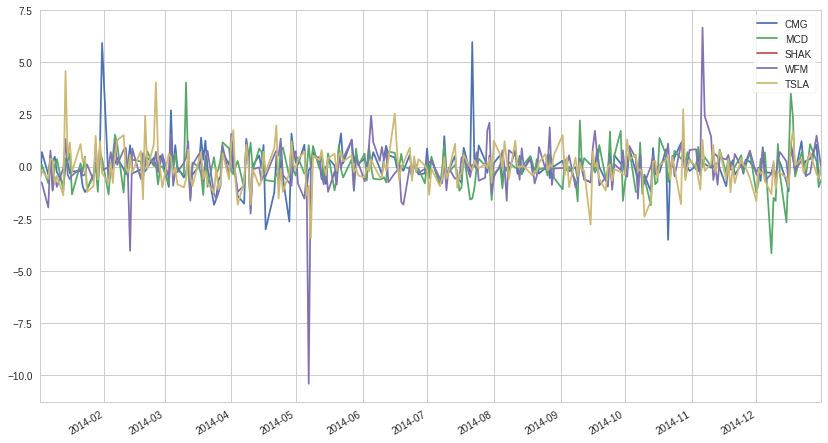

In [149]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

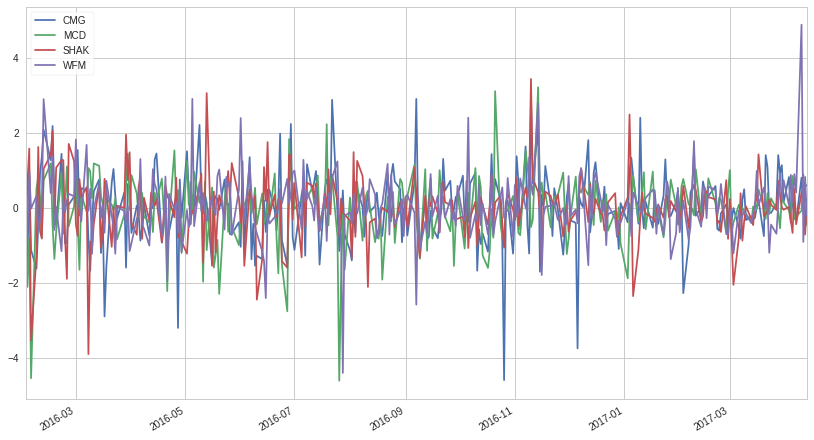

In [152]:
nr = (mr - mr.mean(axis=0))/mr.std(axis=0)
nr.loc['2016-02-02':'2017-04-14'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [154]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.columns = prices.columns

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


In [160]:
rma = pd.rma(precio, 30)
rma.columns = precio.columns

SecurityViolation: 0002 Security Violation(s): Accessing pd.rma raised an AttributeError. Did you mean to access pd.ewma instead?

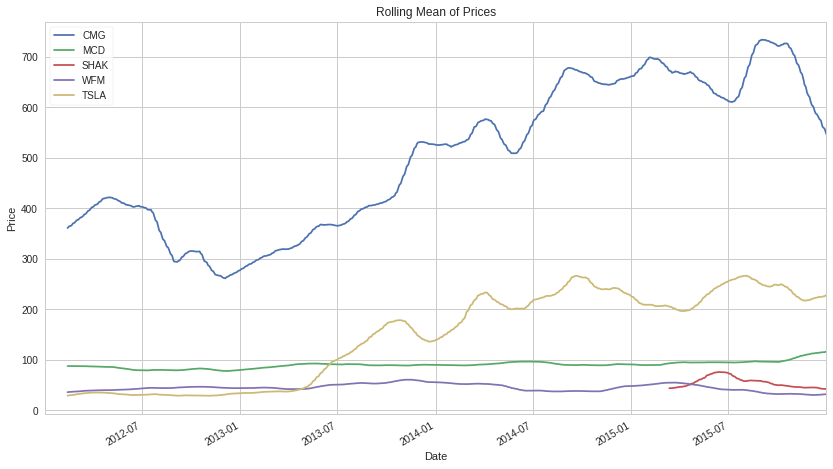

In [155]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [158]:
rma.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend();

NameError: name 'rma' is not defined

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*